# Exploring Star Wars Surveys

    Owner: Jason Lee

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

We need to specify an encoding because the data set has some characters that aren't in Python's default utf-8 encoding. You can read more about character encodings on developer Joel Spolsky's blog.

The data has several columns, including:

- RespondentID - An anonymized ID for the respondent (person taking the survey)
- Gender - The respondent's gender
- Age - The respondent's age
- Household Income - The respondent's income
- Education - The respondent's education level
- Location (Census Region) - The respondent's location
- Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
- Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in columnar format. As a result, this data set needs a lot of cleaning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read file with specified encoding
star_wars = pd.read_csv("StarWars.csv", encoding="ISO-8859-1")

# Setting print options
pd.set_option('display.max_rows',     500)
pd.set_option('display.max_columns',  500)
pd.set_option('display.width',       1000)
pd.set_option('display.max_colwidth', 100)

In [2]:
# explore header
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
# review column names
star_wars.columns

Index(['RespondentID', 'Have you seen any of the 6 films in the Star Wars franchise?', 'Do you consider yourself to be a fan of the Star Wars film franchise?', 'Which of the following Star Wars films have you seen? Please select all that apply.', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Which character shot first?', 'Are you familiar with the Expanded Universe?', 'Do you consider yourself to be a fan of the Expanded Universe?æ',
       

In [4]:
# shape
star_wars.shape

(1187, 38)

### Remove Missing
We want to see if any surveys had bad values. Meaning if the respondentid is null. We can remove it below.

In [5]:
# remove any columns where the respondent ID is missing
star_wars = star_wars[star_wars['RespondentID'].notnull() == True]

In [6]:
# check shape
star_wars.shape

(1186, 38)

We can see that only one record had a missing value for the respondent ID. Let's check again there is no null in the Respondent ID column.

In [7]:
# cheak how many missing values in respondent id
star_wars['RespondentID'].isnull().sum()

0

Taking a look at the next two columns, which are

- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

Both represent `Yes/No` questions. They can also be `NaN` where a respondent chooses not to answer a question. We can use the pandas.Series.value_counts() method on a series to see all of the unique values in a column, along with the total number of times each value appears.

Both columns are currently string types, because the main values they contain are Yes and No. We can make the data a bit easier to analyze down the road by converting each column to a Boolean having only the values True, False, and NaN. Booleans are easier to work with because we can select the rows that are True or False without having to do a string comparison.

## Convert Yes/No to True/False

In [8]:
# isolocate the columns to change
cols = ['Have you seen any of the 6 films in the Star Wars franchise?', 
        'Do you consider yourself to be a fan of the Star Wars film franchise?']

# create a dictionary to reasign values
true_false = {"Yes" : True,
              "No"  : False}

# create a for loop to and use map to add the reassigned values
for col in cols:
    star_wars[col] = star_wars[col].map(true_false)

In [9]:
# check if it worked
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts())
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts())

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


We can see that the data is successfully converted in boolean values.

In [10]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Converting Checkbox values
The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply.

The columns for this question are:

- Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.
For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and NaN in the mapping dictionary.

In [11]:
# create a column name list for select values
cols  = star_wars.columns[3:9]

# dictionary for if a user watched the movive or not
seen_unseen = {
                "Star Wars: Episode I  The Phantom Menace"     : True,
                "Star Wars: Episode II  Attack of the Clones"  : True,
                "Star Wars: Episode III  Revenge of the Sith"  : True,
                "Star Wars: Episode IV  A New Hope"            : True,
                "Star Wars: Episode V The Empire Strikes Back" : True,
                "Star Wars: Episode VI Return of the Jedi"     : True,
                np.NaN                                         : False
}

# for lop to map the dictionary to the columns
for col in cols:
    star_wars[col] = star_wars[col].map(seen_unseen)

### Rename the Columns
We'll need to rename the columns to better reflect what they represent. We can use the pandas.DataFrame.rename() method on dataframes to accomplish this.

In [12]:
# rename the columns through a dictionary
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "episode_1",
        "Unnamed: 4": "episode_2",
        "Unnamed: 5": "episode_3",
        "Unnamed: 6": "episode_4",
        "Unnamed: 7": "episode_5",
        "Unnamed: 8": "episode_6"
        })

## Ranking the Movies
The next six columns ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

- Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
- Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
- Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
- Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
- Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

In [13]:
# rename the columns to rank sequence
star_wars = star_wars.rename(columns = {
            "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." : "rank_1",
            "Unnamed: 10" : "rank_2",
            "Unnamed: 11" : "rank_3",
            "Unnamed: 12" : "rank_4",
            "Unnamed: 13" : "rank_5",
            "Unnamed: 14" : "rank_6"
})

In [14]:
# change the types of the columns to floats
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

## Explore the highest ranked movies from Episode 1 - 6
Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. To do this, take the mean of each of the ranking columns using the pandas.DataFrame.mean() method on dataframes.

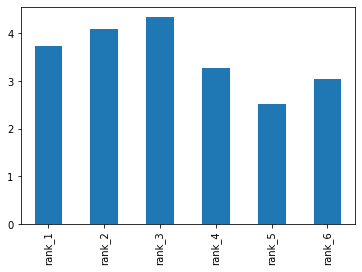

In [15]:
star_wars.iloc[:,9:15].mean().plot(kind='bar')

Since we are taking the `mean` result the number outputted in each rank would represent the episode number. Looking at the result we can see that the original Star Wars episode which would were 4 - 6 had better ranks. (Lower ranks mean better).

It is understandable that the originals were more favored due to the hype they received over the years. It is well known that the newer version didn't live up to the bill. We can see the mean values for the ranks 4 to 6 are low. The low value tells us those ranks have low means and therefore represent the Episode between 1-3 possibly.

## Explore how many people have seen the movies
When we call methods like pandas.DataFrame.sum() or mean(), they treat Booleans like integers. They consider True a 1, and False a 0. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

In [16]:
#watched columns
cols =  star_wars.columns[3:9]

# how many times each episode is watched
for col in cols:
    print(f"{col} watched:", star_wars[col].sum())

episode_1 watched: 673
episode_2 watched: 571
episode_3 watched: 550
episode_4 watched: 607
episode_5 watched: 758
episode_6 watched: 738


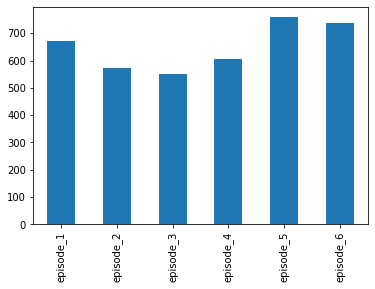

In [17]:
star_wars.iloc[:,3:9].sum().plot(kind='bar')

Looking at how many people watched the episode we see an positive correlation with the episode 3 and episode 5 viewers. Episode 5 earlier had the highest ranking, and here it has the most views. In comparison episode 3 had the lowest ranking, and the lowest views. Interesting again to see this. One would have assumed that since Episode 3 was the final showing of the Star Saga it would have gathered a large audience. Clearly it was not the case for this sample size.

## Demographic Trends
We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Let's explore the genders.

- Gender - Male or Female

### Genders

In [18]:
# spliting by gender
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

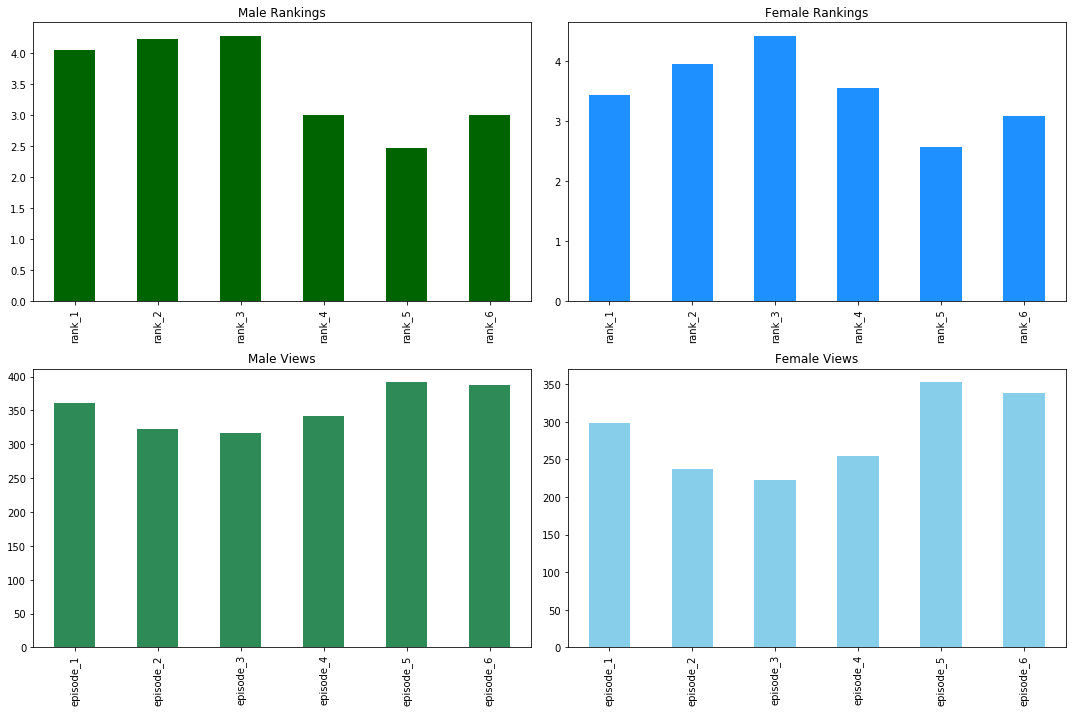

In [19]:
fig, ax = plt.subplots(figsize = (15, 10))


# male ranking
plt.subplot(2,2,1)
plt.title('Male Rankings')
males.iloc[:,9:15].mean().plot(kind='bar', color ='darkgreen')

# female ranking
plt.subplot(2,2,2)
plt.title('Female Rankings')
females.iloc[:,9:15].mean().plot(kind='bar', color ='dodgerblue')

# male view count
plt.subplot(2,2,3)
plt.title('Male Views')
males.iloc[:,3:9].sum().plot(kind='bar', color ='seagreen')

# female view count
plt.subplot(2,2,4)
plt.title('Female Views')
females.iloc[:,3:9].sum().plot(kind='bar', color ='skyblue')


plt.tight_layout()

If we compare how the rankings and views look between genders we can find some interesting insights. For females, it looks like their number one rank film has a lower mean value to the males. The males has an approximately mean value of 4, where as the females is 3.5, meaning females might have enjoyed the remake episodes (Episodes 1, 2 and 3).

Looking at the total views, we see looking a the y-axis range, females watched less than the males. They both have a similar distribution in viewer ship but overall females have less. Episode 3 is again the least watched movie out of the 6.

## Characters
Like any big movie franchise, the actor and actresses play a big role in defining whether or not a viewer enjoyed the movie. In this dataset there are some questions relating to individual characters. Before we explore this information we will need to clean up some of the questions and answers.

In [20]:
# rename questions to appropraite characters
star_wars = star_wars.rename(columns = 
                            {"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her." : "Han Solo",
                             "Unnamed: 16" : "Luke Skywalker",
                             "Unnamed: 17" : "Princess Leia Organa",
                             "Unnamed: 18" : "Anakin Skywalker",
                             "Unnamed: 19" : "Obi Wan Kenobi",
                             "Unnamed: 20" : "Emperor Palpatine",
                             "Unnamed: 21" : "Darth Vader",
                             "Unnamed: 22" : "Lando Calrissian",
                             "Unnamed: 23" : "Boba Fett",
                             "Unnamed: 24" : "C-3PO",
                             "Unnamed: 25" : "R2 D2",
                             "Unnamed: 26" : "Jar Jar Binnks",
                             "Unnamed: 27" : "Padme",
                             "Unnamed: 28" : "Yoda"                                
                            })
#check it worked
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3PO,R2 D2,Jar Jar Binnks,Padme,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [21]:
# check sample of the types of answer per character questions
star_wars['Yoda'].value_counts()

Very favorably                                 605
Somewhat favorably                             144
Neither favorably nor unfavorably (neutral)     51
Unfamiliar (N/A)                                10
Somewhat unfavorably                             8
Very unfavorably                                 8
Name: Yoda, dtype: int64

We can see there were 6 answers to choose from per character.

### View Character Likeability
Now that we see there are 6 options. Let's plot graphs for 3 of the ratings.

- Very favorable
- Neutral
- Very UNfavorable

In [22]:
# isloate the characters
cols = star_wars.columns[15:29]

# list for only 3 rating values
ratings = ['Very favorably','Neither favorably nor unfavorably (neutral)', 'Very unfavorably' ]

# empty lists to save values
favorable_list = []
neutral_list = []
unfavorable_list = []
characters = []

# nested for loop to get the percentages of likeability for each character
for col in cols:
    characters.append(col)
    for rating in ratings:
        percent = ((star_wars[star_wars[col] == rating]['RespondentID'].count()/star_wars['RespondentID'].count()) *100).round(2)
    #     print(f'{percent}% - are very favorable for {col}')
        if rating == 'Very favorably':
            favorable_list.append(percent)
        elif rating == 'Neither favorably nor unfavorably (neutral)':
            neutral_list.append(percent)
        elif rating == 'Very unfavorably':
            unfavorable_list.append(percent)
        else:
            print("error")

In [24]:
# convert each into a dataframe
characters             = pd.DataFrame(characters)
favorable_list         = pd.DataFrame(favorable_list)
neutral_list           = pd.DataFrame(neutral_list)
unfavorable_list       = pd.DataFrame(unfavorable_list)

# concat the lists to have 3 dataframes
favorable_characters   =  pd.concat([characters, favorable_list], axis = 1)
neutral_characters     =  pd.concat([characters, neutral_list], axis = 1)
unfavorable_characters =  pd.concat([characters, unfavorable_list], axis = 1)

In [25]:
# rename the column names
favorable_characters.columns   = ['Character', 'Percentage']
neutral_characters.columns     = ['Character', 'Percentage']
unfavorable_characters.columns = ['Character', 'Percentage']

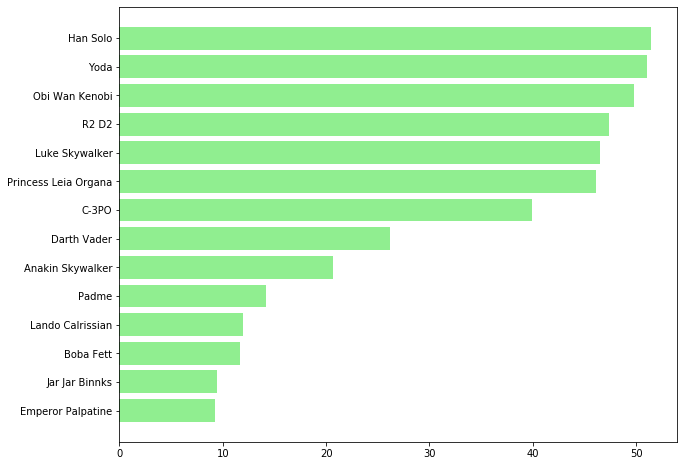

In [26]:
# plot the graphs for favorable
favorable_characters = favorable_characters.sort_values('Percentage')
plt.figure(figsize = (10,8))
plt.barh(favorable_characters['Character'], favorable_characters['Percentage'], color='lightgreen')
plt.show()

We see that Han Solo, Yoda and Obi Wan were the most liked characters based on the percentage of people liking them per character.

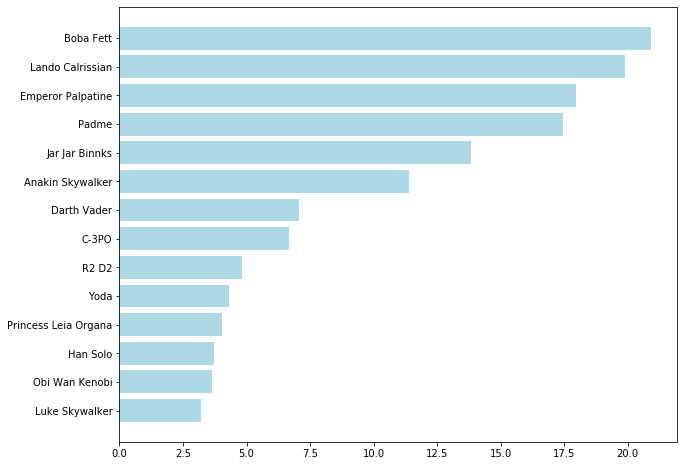

In [27]:
# plot the graphs for netural
neutral_characters = neutral_characters.sort_values('Percentage')
plt.figure(figsize = (10,8))
plt.barh(neutral_characters['Character'], neutral_characters['Percentage'], color='lightblue')
plt.show()

Looking at neutral characters we see that typically the characters with the least amount of screentime to have the most neutral votes. Boba Fett and Lando had an impact in the movies but nonetheless not a lot of time for characters to pick a side.

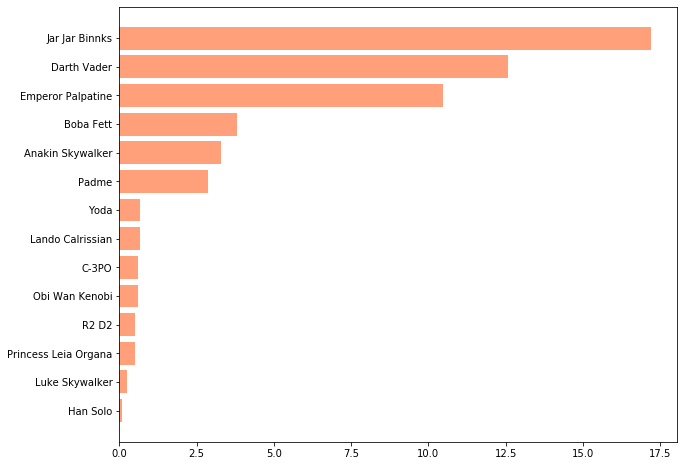

In [28]:
# plot the graphs for netural
unfavorable_characters = unfavorable_characters.sort_values('Percentage')
plt.figure(figsize = (10,8))
plt.barh(unfavorable_characters['Character'], unfavorable_characters['Percentage'], color='lightsalmon')
plt.show()

If you have watched the movies and spoken to your friends, I think it is safe to say that Jar Jar Binnks was expected to be the least liked character. The rest of the characters that are least liked are the bad guys. Darth Vader, Palpatine, Boba fett and Anakin. 

One can argue that Darth Vader is a surprised inclusion so high up for being unfavorable. He is notorious for his evil role, and will go down as one of the most reputable bad guys in cinema history. However he did save Luke in the end, so despite the bad in him he could have scored some points on the favored side. (Spoiler for those of you who haven't seen it - Sorry).

## The Expanded Universe
Star Wars has been expanded to media other than the original films. This spin-off material is licensed and moderated by Lucasfilm, though during his involvement with the franchise George Lucas reserved the right to both draw from and contradict it in his own works.

There are 2 questions focused on asking questions Expanded Universe. Let's explore.

In [30]:
star_wars['Are you familiar with the Expanded Universe?'].value_counts()

No     615
Yes    213
Name: Are you familiar with the Expanded Universe?, dtype: int64

We can see around 75% of the responders are not fans of the Expanded Universe. Let's compare the movie preference of both these demographics.

In [38]:
expand_yes = star_wars[star_wars['Are you familiar with the Expanded Universe?'] == 'Yes']
expand_no  = star_wars[star_wars['Are you familiar with the Expanded Universe?'] == 'No']

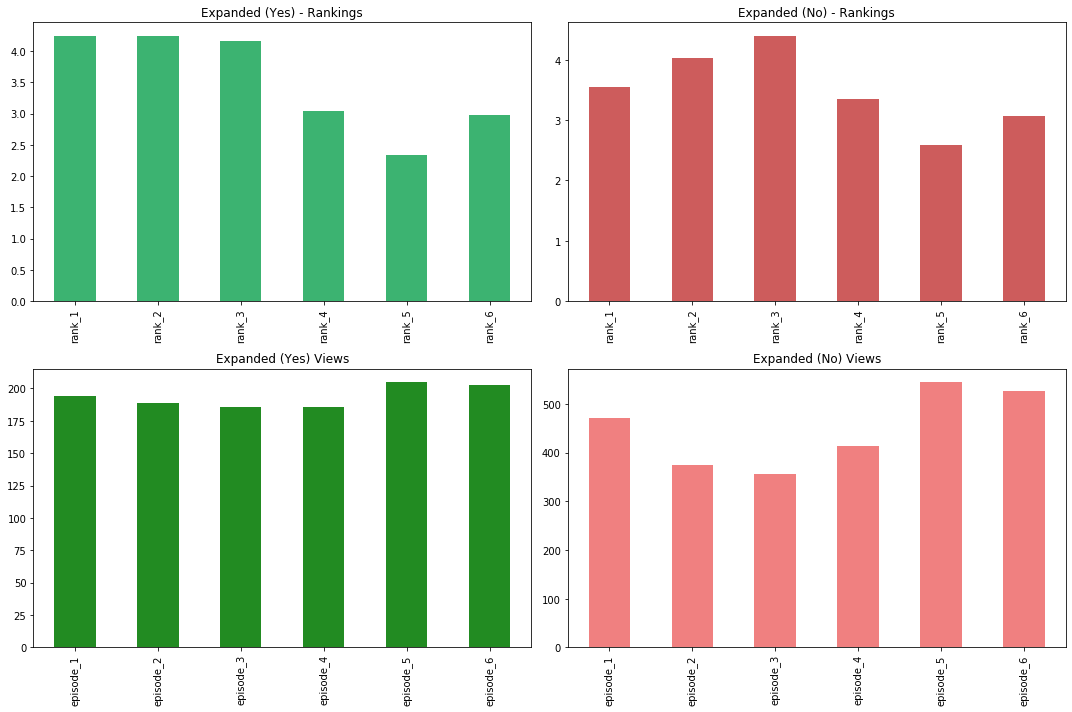

In [41]:
fig, ax = plt.subplots(figsize = (15, 10))


# expanded yes ranking
plt.subplot(2,2,1)
plt.title('Expanded (Yes) - Rankings')
expand_yes.iloc[:,9:15].mean().plot(kind='bar', color ='mediumseagreen')

# expanded no ranking
plt.subplot(2,2,2)
plt.title('Expanded (No) - Rankings')
expand_no.iloc[:,9:15].mean().plot(kind='bar', color ='indianred')

# expanded yes view count
plt.subplot(2,2,3)
plt.title('Expanded (Yes) Views')
expand_yes.iloc[:,3:9].sum().plot(kind='bar', color ='forestgreen')

# expanded no view count
plt.subplot(2,2,4)
plt.title('Expanded (No) Views')
expand_no.iloc[:,3:9].sum().plot(kind='bar', color ='lightcoral')


plt.tight_layout()

Looking at the graphs above we can see a couple interesting insights.

   - People who aren't familiar of the Expanded Universe seemed to have a lower mean score for their number 1 ranked film. This could mean that they were interested in the remake versions released in the 2000s. Whereas the responders who are aware of the expanded universe have a clear distinction that their top 3 rank films have high movie scores meaning Episode 4,5 or 6.
   - Surprising to see the non expanded universe users have watched Episode 1 more than Episode 4. That could mean that most of them were not familiar with the franchise, or did not have a strong interest to watch the older versions.

In [29]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,episode_1,episode_2,episode_3,episode_4,episode_5,episode_6,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3PO,R2 D2,Jar Jar Binnks,Padme,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Star Trek Fans
In the survey there is one interesting question that asks responders if they are a fan of the Star Trek franchise. The Star Trek franchise has their unique fan base, but follows a similar sci-fi fantasy to Star Wars. It will be interesting to see the reviews of fans who enjoy Star Trek.

In [42]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts()

No     641
Yes    427
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

Not too much disparity in the split with more fans not being interest in the Star Trek franchise. Let's explore the ratings.

In [43]:
star_trek_yes = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'Yes']
star_trek_no  = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'No']

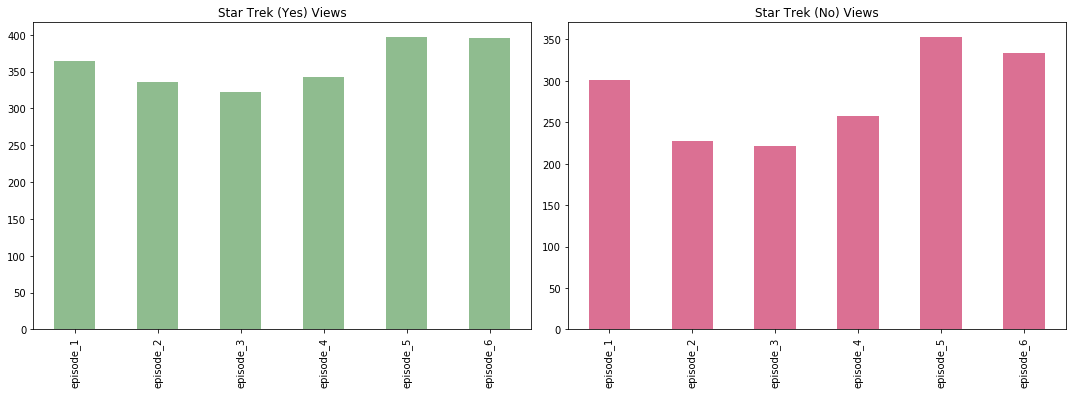

In [44]:
fig, ax = plt.subplots(figsize = (15, 10))

# Star Trek - YES view count
plt.subplot(2,2,3)
plt.title('Star Trek (Yes) Views')
star_trek_yes.iloc[:,3:9].sum().plot(kind='bar', color ='darkseagreen')

# Star Trek - NO view count
plt.subplot(2,2,4)
plt.title('Star Trek (No) Views')
star_trek_no.iloc[:,3:9].sum().plot(kind='bar', color = 'palevioletred')


plt.tight_layout()

We can see that the graph on the left which are the Star Trek fans have more total views on every episode in comparison to the non Star Trek fans. There likely is a strong relationship if someone enjoys both Star Wars and Star trek they are generally big fans of the sci-fi industry. It would be interesting to explore how other franchises such as Lord of the Rings, Avengers, or Harry Potter could have an effect on Star Wars fans. If there is a relationship outside the Sci-fi universe it could mean that viewers are simplify fans of main stream blockbuster hits.